# Package Import and Setting Up

In [21]:
!sudo apt-get install graphviz graphviz-dev
!pip install pyvis pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6).
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [22]:
# from google.colab import output
# output.serve_kernel_port_as_window(8081)

In [23]:
# Import necessary libraries and modules
from google.colab import userdata # For Secret keeping in google colab

import datetime
import requests
import json
import time
import re
from pprint import pprint
from bs4 import BeautifulSoup





# Data manipulation and analysis libraries
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical computing

# Data visualization libraries
import matplotlib.pyplot as plt     # For creating visualizations
import seaborn as sns               # For advanced statistical data visualizations
import networkx as nx
from pyvis import network
import matplotlib.ticker as ticker  # For customizing tick locations and formats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from wordcloud import WordCloud     # For generating word cloud images from text data


%matplotlib inline

# Data Extractor

In [24]:
def href_extractor(soup):
  try:
    m1_extraction=False

    for ele in soup.find("div",{'id':"bodyContent"}).find_all('p'): # Finding the first wiki word in paragraph
      href_ele=ele.find('a',href=re.compile("^(/wiki/)((?!:).)*$"))
      if href_ele is not None:
        m1_extraction=True
        return href_ele.get("href"),href_ele.text,None

    if(m1_extraction==False): # Finding in overall wiki links if no first paragraph
      print("Extraction method 2 activated")
      href_ele=soup.find("div",{'id':"bodyContent"}).find_all('a',href=re.compile("^(/wiki/)((?!:).)*$"))[0]
      return href_ele.get("href"),href_ele.text,None
    else:
        return [None,None,None]
  except:
    return [None,None,None]

In [25]:
connecting_dictionary={}
word_set=set()
connection_set_checker={}

In [26]:
def wiki_maker(base_site,search_word,page_limit,dup_limiter):

  limit_counter=0
  search_wiki=f"/wiki/{search_word.lower()}"
  init_mode=True

  for i in range(page_limit):

    r=requests.get(f"{base_site}{search_wiki}")
    soup=BeautifulSoup(r.content,"lxml")
    href_object=href_extractor(soup)

    if(href_object!=None):
      next_wiki,next_word,href=href_object
    else:
      break

    if((next_wiki==None and next_word==None and href==None)):
      break

    search_word,next_word=search_word.lower(),next_word.lower()
    c_set=tuple([search_word,next_word])



    if(c_set not in connection_set_checker):
      print(f"{search_word} --> {next_word}")
      connecting_dictionary[search_word]=next_word # Adding to connecting dictionary
      connection_set_checker[c_set]=True

    if(init_mode or next_word not in word_set):
      word_set.add(next_word) # Adding it to set for duplicate checking
      search_wiki,search_word=next_wiki,next_word # Updating for next iteration
      init_mode=False
    else:
      limit_counter+=1
      if(limit_counter>dup_limiter):
        print("-"*50)
        print("Breaking due to recurring duplicate limit reached")
        print("-"*50)
        break


    # print(f"{search_word} --> {next_word}")
    # connecting_dictionary[search_word]=next_word # Adding to connecting dictionary
    # word_set.add(next_word) # Adding it to set for duplicate checking
    # search_wiki,search_word=next_wiki,next_word # Updating for next iteration

In [27]:
word_list=[
    "Apple","Bee","Cat","Dog","Elephant","Fish","Goat","Heart","Igloo","Jacket","Kite","Lion","Mouse","Nest","Octopus","Penguin","Queen",
    "Rabbit","Sun","Turtle","Umbrella","Violin","Water","Xylophone","Yarn","Zygote","Wikipedia","Electron","Marriage","Python","Reptile",
    "GitHub","api","keyboard","home","house","romeo","Gorilla","Kong","Godzilla","research","reddit","drag","dump","hello","word","hola",
    "ram","rom","disk","Cisco","Flash"
]

In [28]:
# word_list=["Apple"]

In [29]:
%%time
for search_word in word_list:
  print("+"*100)
  print(f"Searching for : {search_word}")
  print("+"*100)

  page_limit,dup_limiter=100,2
  base_site="https://en.wikipedia.org"

  word_set.add(search_word.lower())
  wiki_maker(base_site,search_word,page_limit,dup_limiter)

  time.sleep(2)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Searching for : Apple
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
apple --> fruit
fruit --> botany
botany --> science
science --> systematic
systematic --> empirical
empirical --> proposition
proposition --> philosophy of language
philosophy of language --> analytic philosophy
analytic philosophy --> philosophy
philosophy --> ancient greek
ancient greek --> greek language
greek language --> modern greek
modern greek --> endonym
endonym --> name
name --> referent
referent --> person
person --> reason
reason --> logic
logic --> reasoning
reasoning --> conclusion
conclusion --> concept
concept --> abstract
abstract --> rules
rules --> philosophy of logic
philosophy of logic --> philosophy
--------------------------------------------------
Breaking due to recurring duplicate limit reached
----------------------------------------------

In [30]:
print(json.dumps(connecting_dictionary,indent=2))
print("+"*100)
# pprint(word_set)
# print("+"*100)
pprint(connection_set_checker,indent=4)
print("+"*100)

{
  "apple": "fruit",
  "fruit": "botany",
  "botany": "science",
  "science": "systematic",
  "systematic": "empirical",
  "empirical": "proposition",
  "proposition": "philosophy of language",
  "philosophy of language": "analytic philosophy",
  "analytic philosophy": "philosophy",
  "philosophy": "ancient greek",
  "ancient greek": "greek language",
  "greek language": "modern greek",
  "modern greek": "endonym",
  "endonym": "name",
  "name": "referent",
  "referent": "person",
  "person": "reason",
  "reason": "logic",
  "logic": "reasoning",
  "reasoning": "conclusion",
  "conclusion": "concept",
  "concept": "abstract",
  "abstract": "rules",
  "rules": "philosophy of logic",
  "philosophy of logic": "philosophy",
  "bee": "insects",
  "insects": "latin",
  "latin": "classical language",
  "classical language": "language",
  "language": "communication",
  "communication": "information",
  "information": "abstract concept",
  "abstract concept": "rules",
  "cat": "family",
  "dom

# Graph Creation

## Directed Graph Config

In [61]:
# Connection/Edge mode
# Create an example dictionary with key-value pairs
graph_data = connection_set_checker

# Create an empty graph
G = nx.DiGraph()

# Add nodes and edges from the dictionary
for nodes, bools in graph_data.items():
    G.add_node(nodes[0])
    G.add_node(nodes[1])
    G.add_edge(nodes[0],nodes[1])

#------------------------------------------------------------------------

# # Node/Vertices Mode
# # Create an example dictionary with key-value pairs
# graph_data = connecting_dictionary

# # Create an empty graph
# G = nx.DiGraph()

# # Add nodes and edges from the dictionary
# for nodes in graph_data:
#     G.add_node(nodes)
#     G.add_node(graph_data[nodes])
#     G.add_edge(nodes,graph_data[nodes])

## Undirected Graph Config

In [62]:
# Connection/Edge mode
# Create an example dictionary with key-value pairs
graph_data = connection_set_checker

# Create an empty graph
G_undirected = nx.Graph()

# Add nodes and edges from the dictionary
for nodes, bools in graph_data.items():
    G_undirected.add_edge(nodes[0],nodes[1])

#-----------------------------------------------------------------------------------------------------------------------------

# # Node/Vertices Mode
# # Create an example dictionary with key-value pairs
# graph_data = connecting_dictionary

# # Create an empty graph
# G_undirected = nx.Graph()

# # Add nodes and edges from the dictionary
# for nodes in graph_data:
#     G_undirected.add_edge(nodes,graph_data[nodes])

## Graphs (Directed Mode)

### Normal Graph

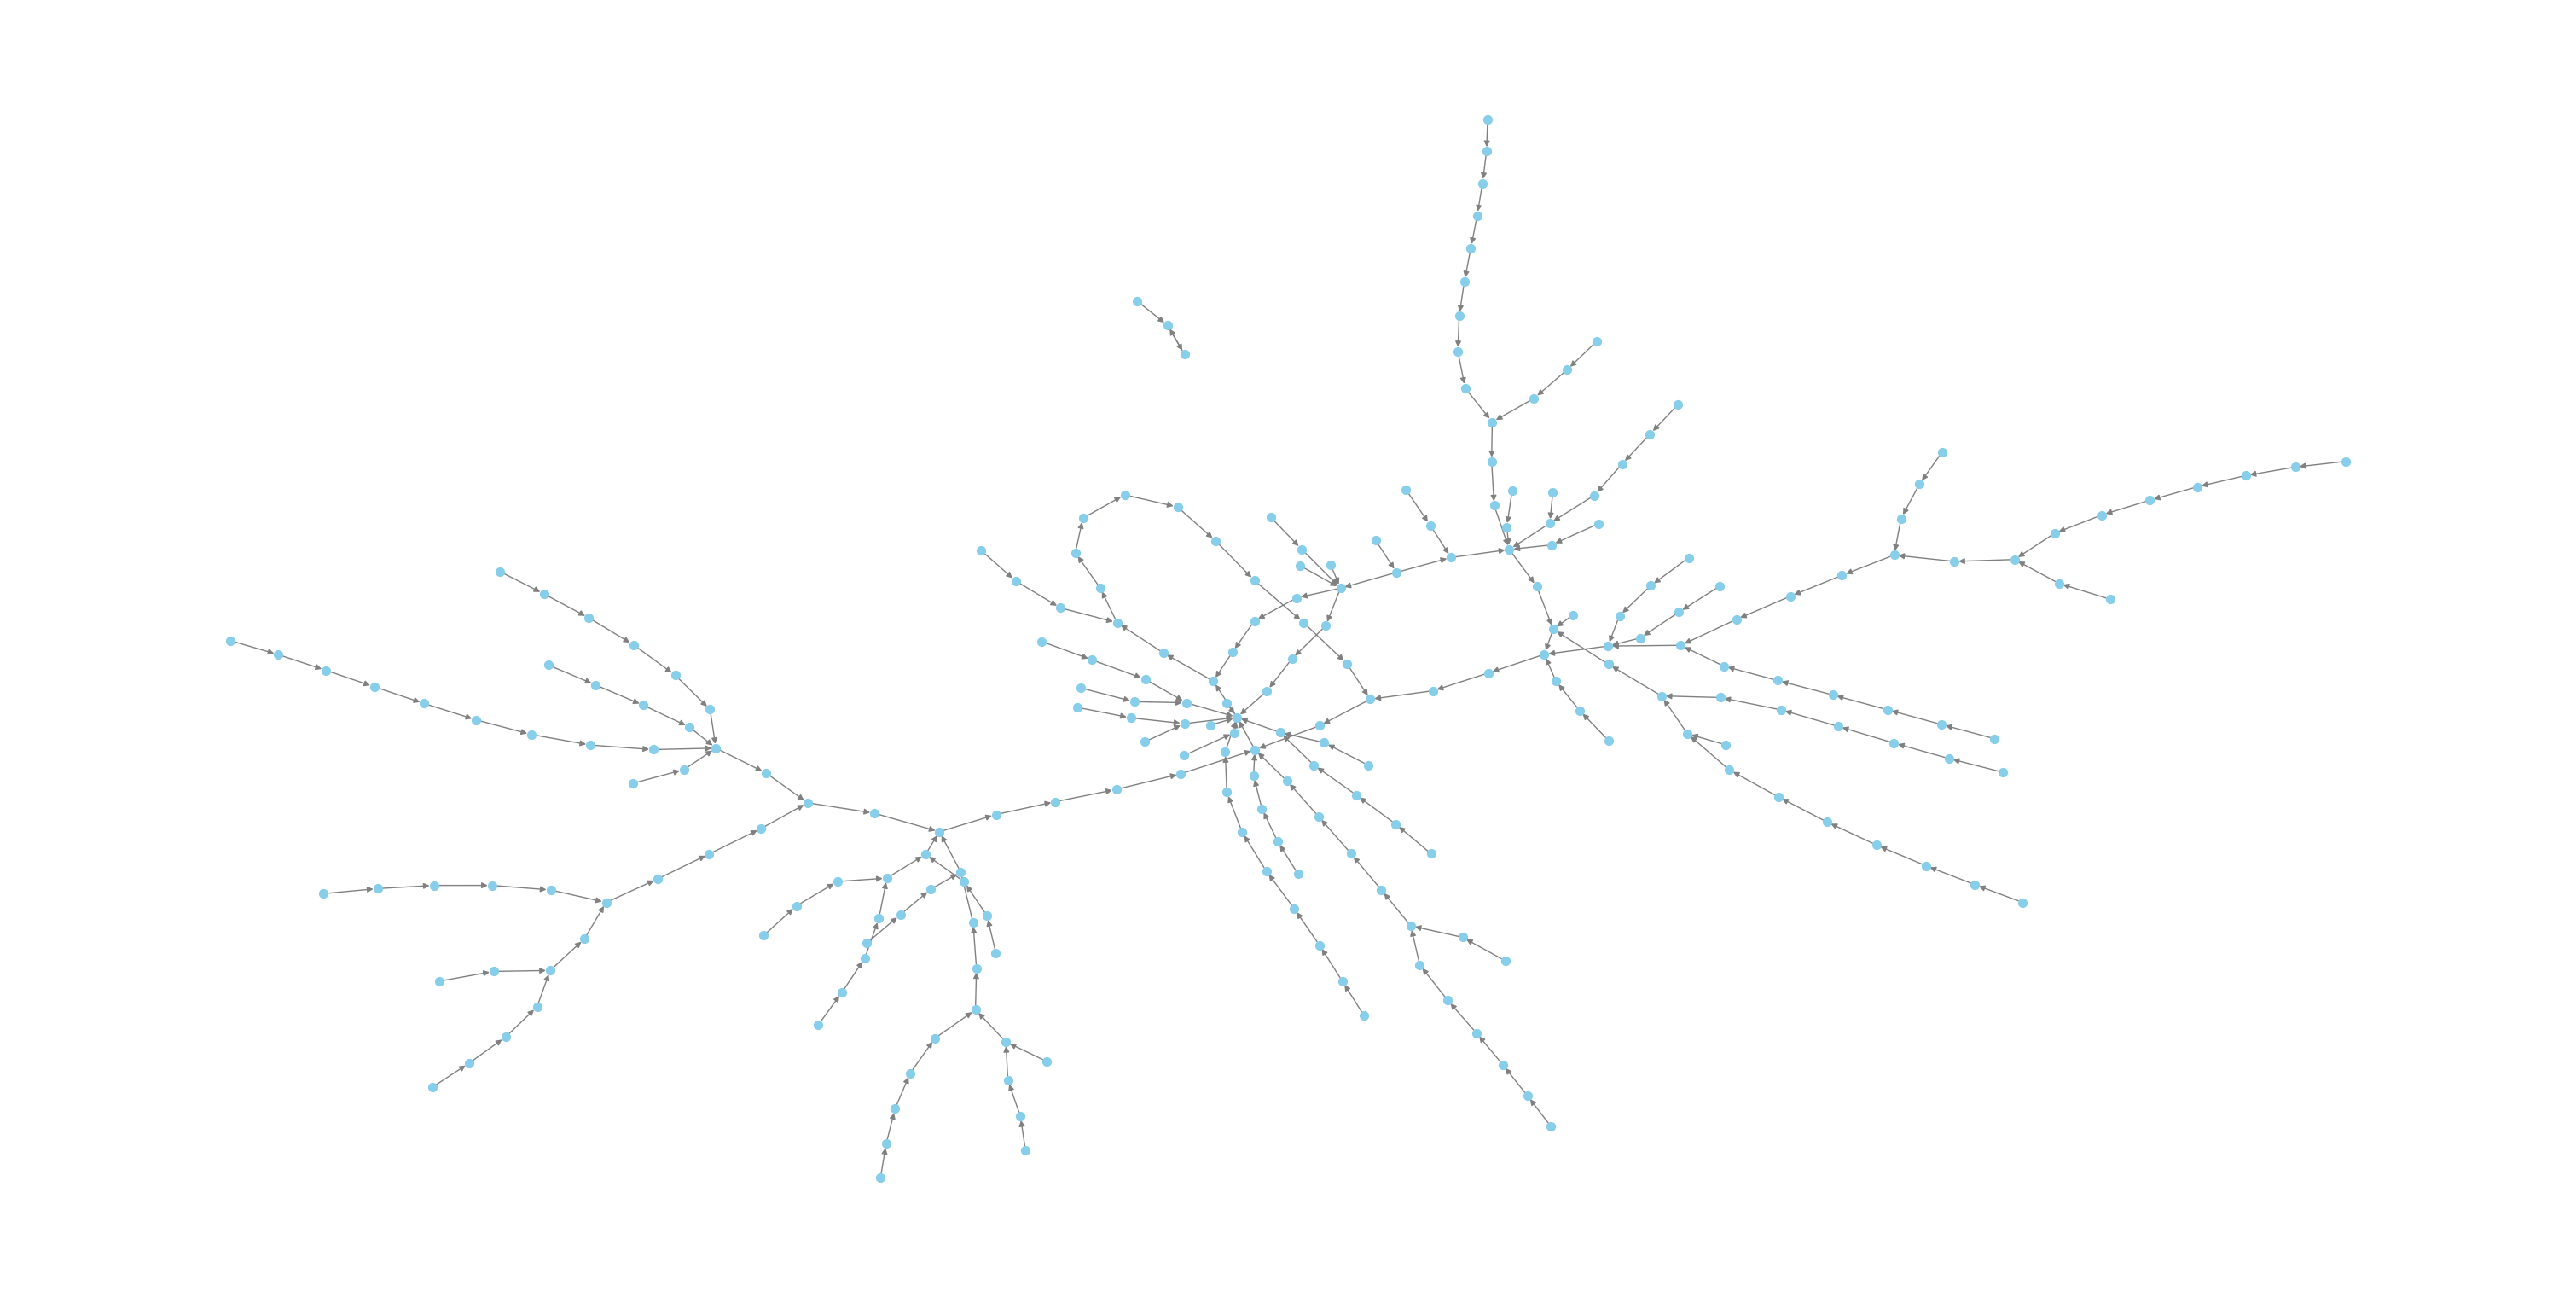

In [63]:
plt.figure(figsize=(30,15))
pos_normal = nx.nx_agraph.graphviz_layout(G, prog="neato")  # you can choose other layout algorithms
nx.draw(G,pos=pos_normal,with_labels=False,node_size=50, node_color='skyblue', font_size=8, edge_color='gray')
plt.show()

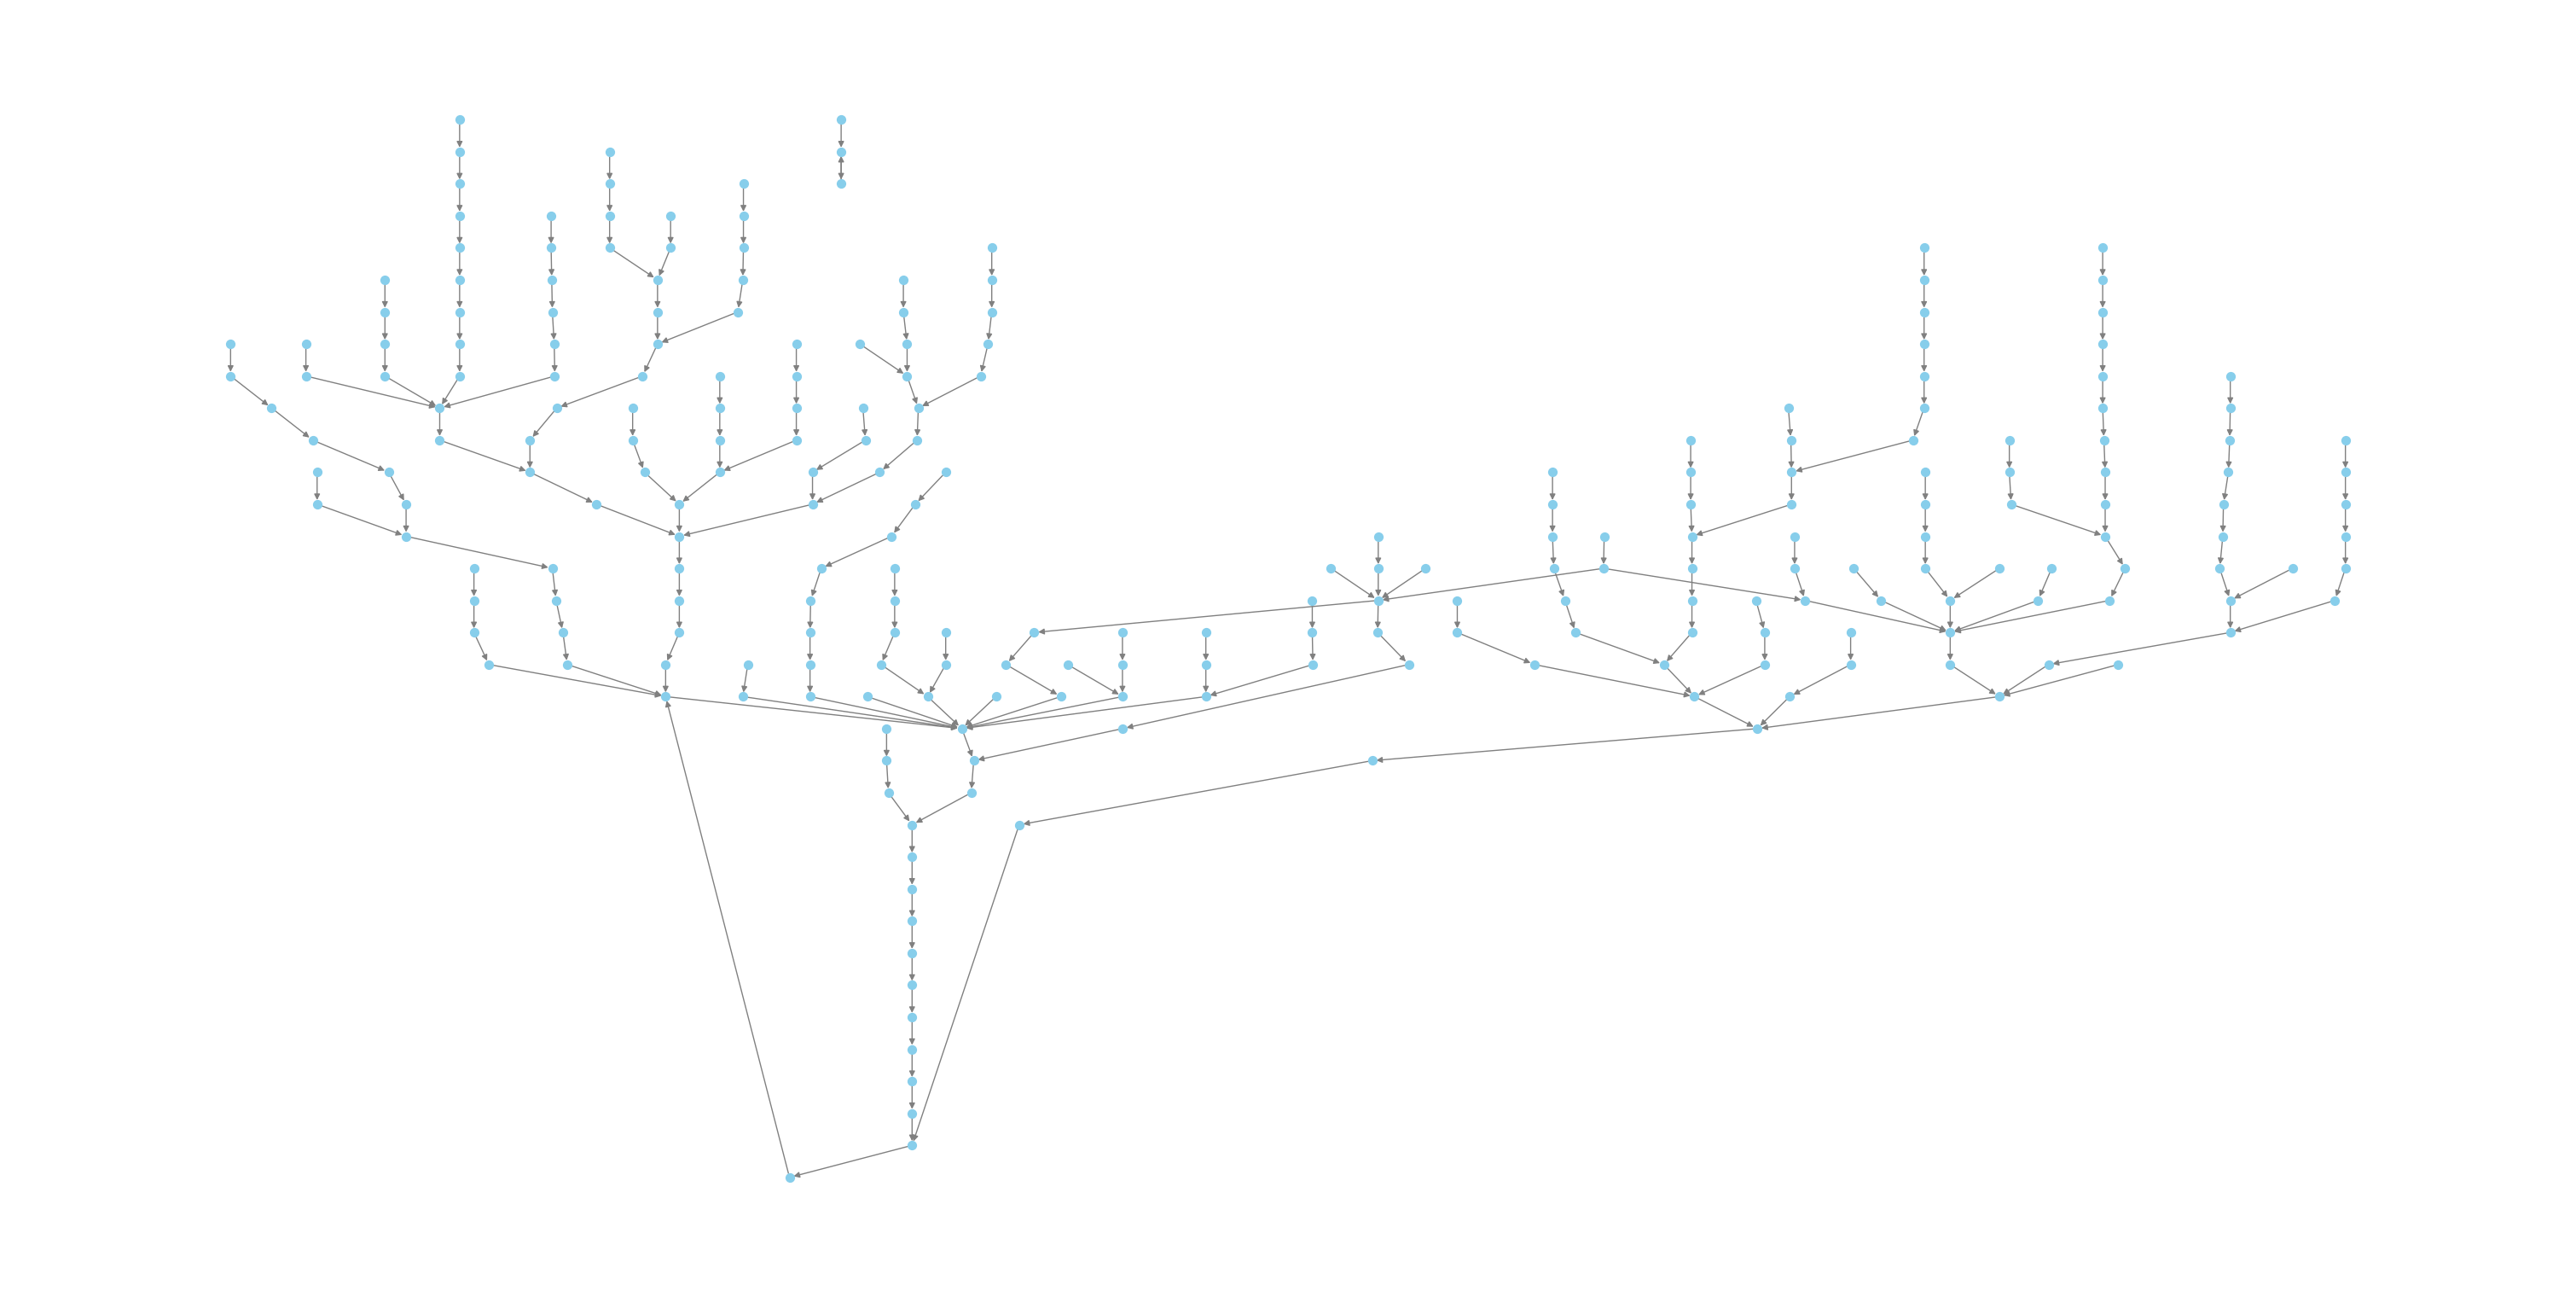

In [64]:
plt.figure(figsize=(30,15))
pos_normal = nx.nx_agraph.graphviz_layout(G, prog="dot")  # you can choose other layout algorithms
nx.draw(G,pos=pos_normal,with_labels=False,node_size=50, node_color='skyblue', font_size=8, edge_color='gray')
plt.show()

### Pyvis Graphs

In [65]:
net = network.Network(notebook=True,directed=True,cdn_resources='in_line',bgcolor = "black",font_color = "white")
net.from_nx(G)

# # Set initial physics options
net.set_options("""
const options = {
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -25000,
      "centralGravity": 0,
      "springLength": 100,
      "springConstant": 0.5,
      "avoidOverlap": 1,
      "damping":1
    },
    "minVelocity": 0.75
  }
}
""")

net.save_graph("wiki_graph.html")
HTML(filename="wiki_graph.html")

### Downloadable graph

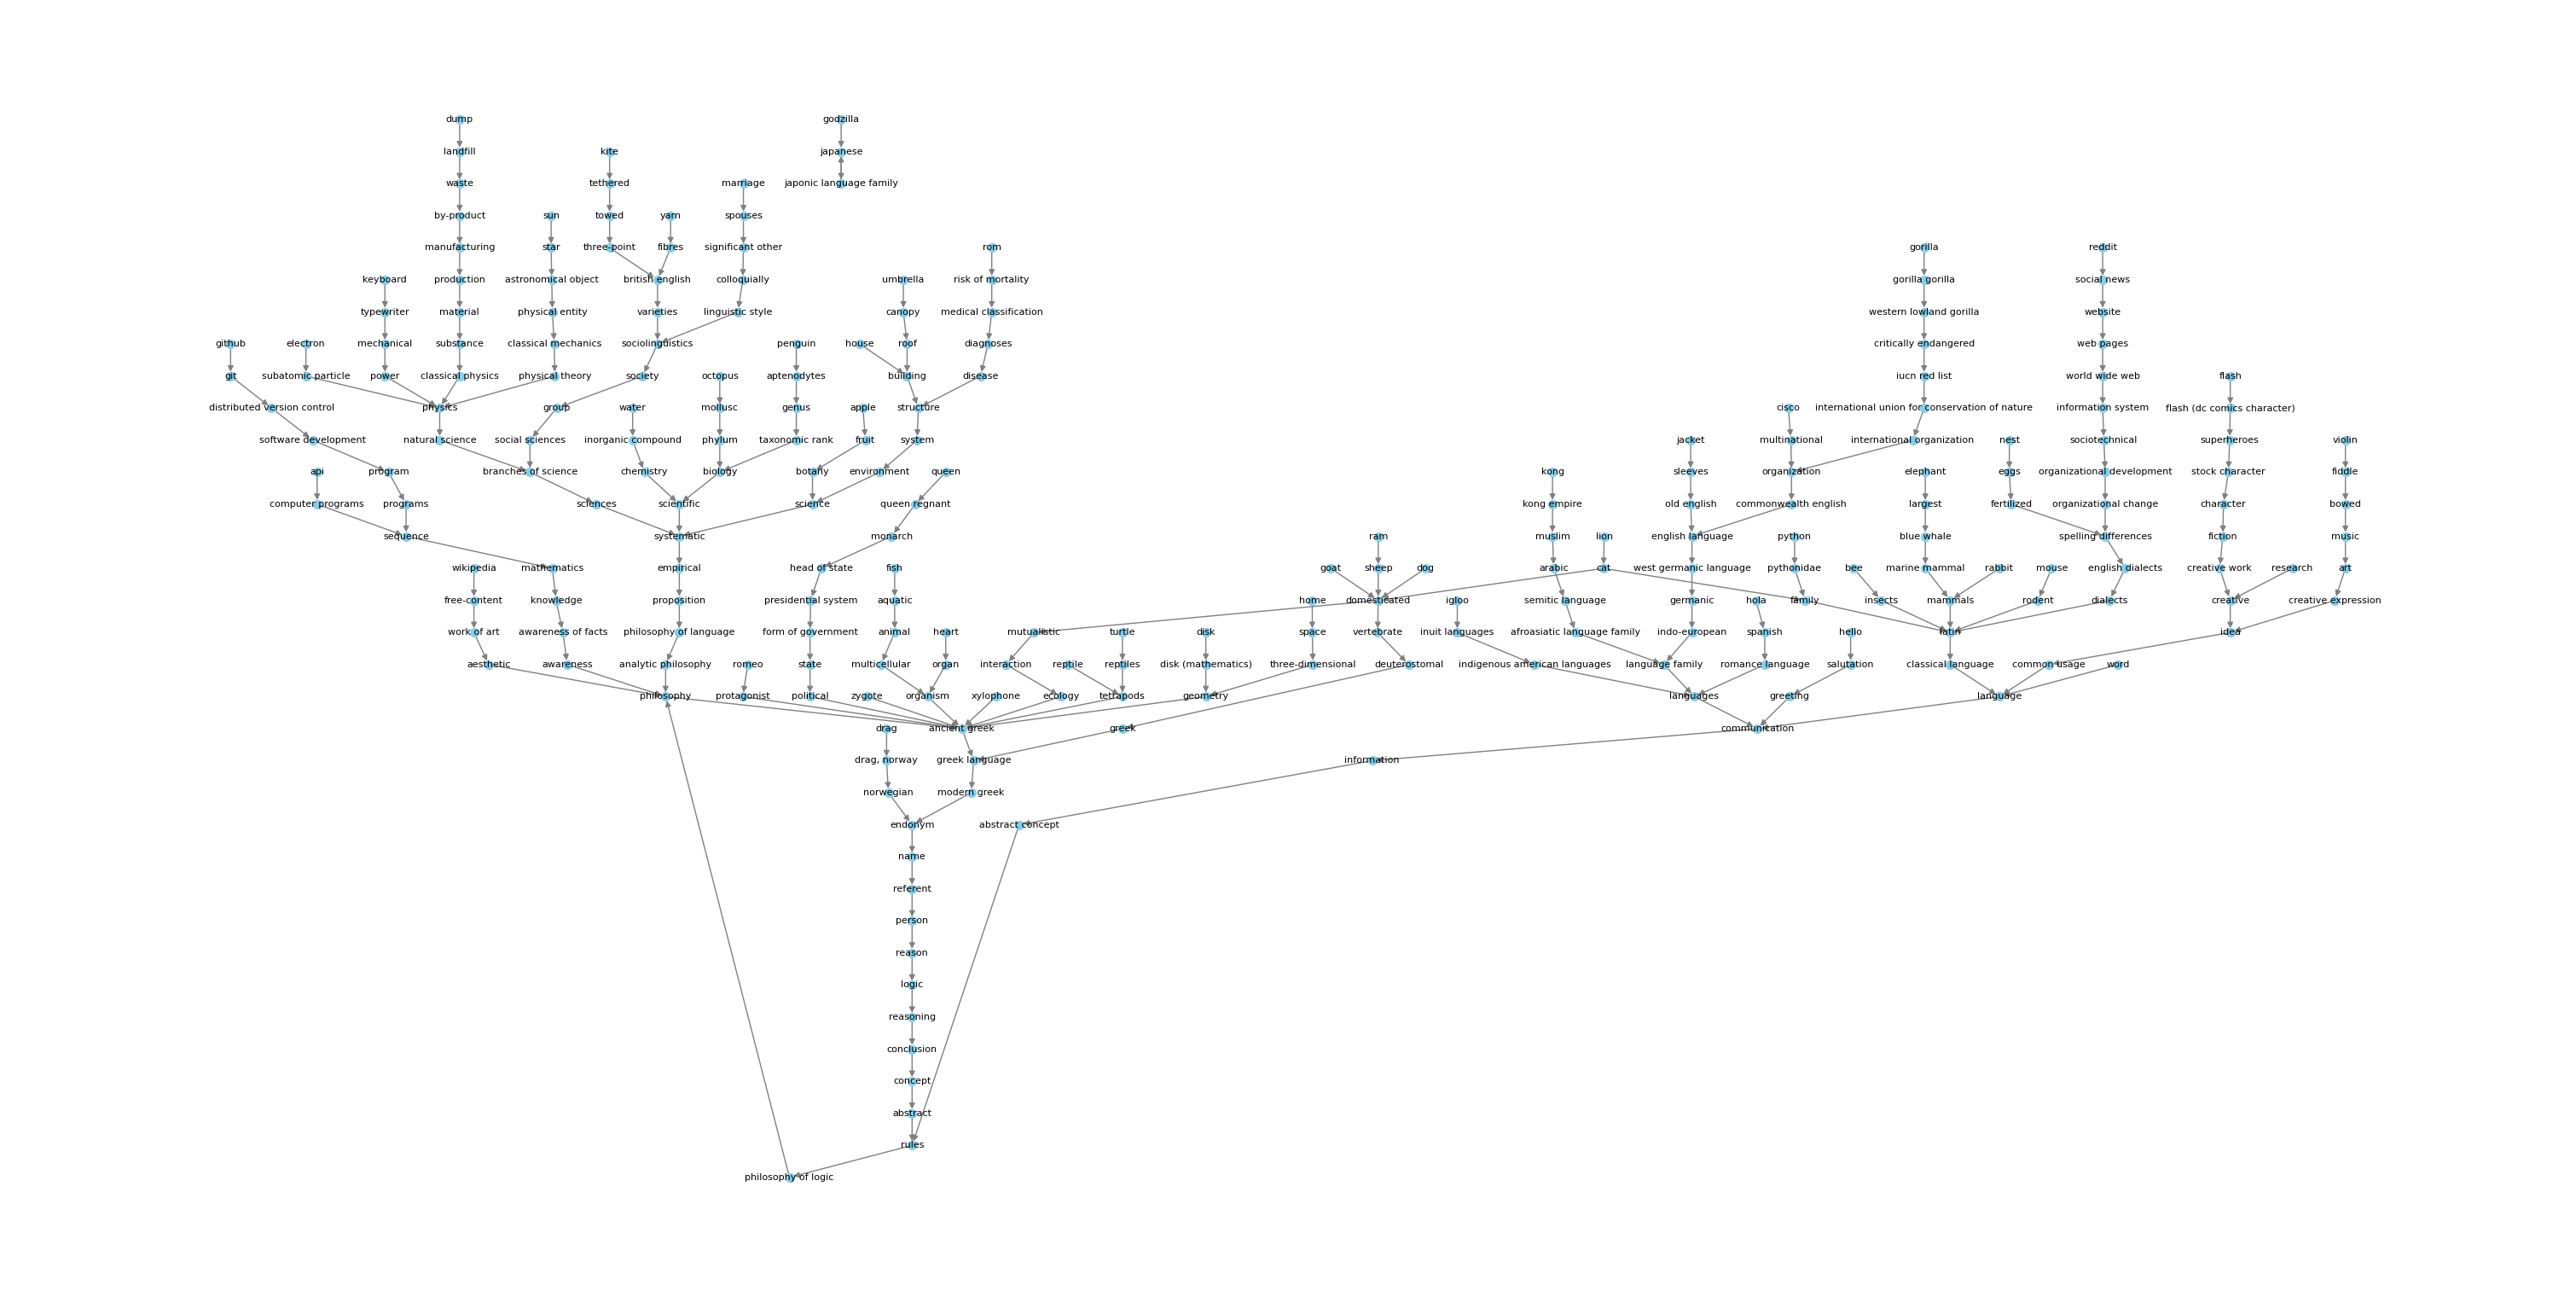

In [66]:
plt.figure(figsize=(30,15))
pos_normal = nx.nx_agraph.graphviz_layout(G, prog="dot")  # you can choose other layout algorithms
nx.draw(G,pos=pos_normal,with_labels=True,node_size=50, node_color='skyblue', font_size=8, edge_color='gray')
plt.savefig('wiki_graph.pdf')

In [67]:
net = network.Network(directed=True,width="100%", height="1000px",bgcolor = "black",font_color = "white")
net.from_nx(G)
net.save_graph("down_wiki_graph.html")

## Graphs (Undirected Mode)

### Graphs

In [68]:
# Create Plotly figure
fig = go.Figure()

# Add edges to the plot with the same color
edge_color = 'rgba(0, 0, 0, 0.5)'
for edge in G_undirected.edges():
    fig.add_trace(go.Scatter(
        x=[],
        y=[],
        mode='lines',
        line=dict(width=2, color=edge_color),
        hoverinfo='none',
        line_shape='linear',  # Ensure line shape is set to 'linear'
        line_smoothing=0  # Set line smoothing to 0
    ))

# Update edge positions using spring layout
pos = nx.spring_layout(G_undirected)
for i, edge in enumerate(G_undirected.edges()):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    fig.data[i].x = [x0, x1, None]
    fig.data[i].y = [y0, y1, None]

# Add nodes to the plot with automatically assigned colors
for i, node in enumerate(G_undirected.nodes()):
    color = f'hsl({i / len(G_undirected.nodes()) * 360}, 50%, 50%)'  # Assign color based on node order
    fig.add_trace(go.Scatter(
        x=[],
        y=[],
        text=[node],
        mode='markers',
        marker=dict(size=20, color=color),
        name=f'Node {node}'
    ))

# Update node positions using spring layout
for i, (node, position) in enumerate(pos.items()):
    fig.data[len(G_undirected.edges()) + i].x = [position[0]]
    fig.data[len(G_undirected.edges()) + i].y = [position[1]]

# Set layout options
fig.update_layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

# Show the plot
fig.show()

In [69]:
# Compute layout positions using the spring layout algorithm
pos = nx.spring_layout(G_undirected)

# Plotly setup
fig = make_subplots(rows=1, cols=1)

edge_x = []
edge_y = []
for edge in G_undirected.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G_undirected.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G_undirected.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: ' + str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig.add_trace(edge_trace)
fig.add_trace(node_trace)

# Set layout options
fig.update_layout(
    title='<b>Network graph made with Python for Wiki Connections</b>',
    titlefont_size=16,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20, l=20, r=20, t=30),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    title_x=0.01,  # Adjust the x-coordinate for title
    title_y=0.975   # Adjust the y-coordinate for title
)

fig.show()

# Misc

In [51]:
!curl ipecho.net/plain

34.28.135.225